In [1]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy
import glob
import gdal
import matplotlib.colors
import matplotlib.cm
import cmocean

In [6]:
#file_dir = '/Users/baird/Dropbox/_data_observations/CALIPSO/'
file_dir = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA_PROCESSED/BORNEO_LANDMASS/'

In [27]:
mean_filename = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA_PROCESSED/BORNEO_LANDMASS/mean_2006-2018_concatenated_total_backscatter_coefficient_interpolated.nc'
all_filename = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA_PROCESSED/BORNEO_LANDMASS/2006-2018_concatenated_total_backscatter_coefficient_interpolated.nc'

In [28]:
mean_ds = xarray.open_dataset(mean_filename)
all_ds = xarray.open_dataset(all_filename)

In [30]:
all_ds_mean = all_ds['gdal_tbc_data_interpolated'].mean(axis=0)

MemoryError: 

In [13]:

mean_data = mean_ds['gdal_tbc_data_interpolated'].values

In [19]:
file_list = sorted(glob.glob(file_dir+'/*T*.nc'))

In [21]:
file_list.__len__()

3591

In [23]:
ds = xarray.open_dataset(file_list[0])
data = ds['gdal_tbc_data_interpolated'].values

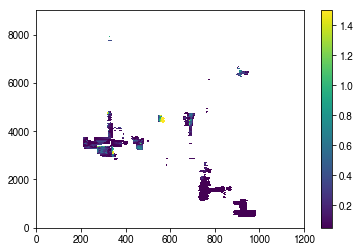

In [26]:
mp.pcolormesh(data[0,:,:], vmin=.05, vmax=1.5); mp.colorbar()

In [11]:
# ===== open file, pull out specific data set
gdal_file = gdal.Open(file_list[1])
gdal_subdatasets = gdal_file.GetSubDatasets()
gdal_clf_ds = gdal.Open(gdal_subdatasets[31][0]) # cloud fraction
gdal_tbc_ds = gdal.Open(gdal_subdatasets[35][0]) # total backscatter

In [12]:
gdal_clf_data = gdal_clf_ds.ReadAsArray()
gdal_tbc_data = gdal_tbc_ds.ReadAsArray()

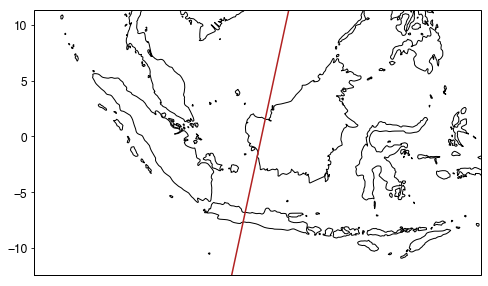

In [13]:
ds = xarray.open_dataset(file_list[1])

lat = ds['Latitude'].sel(fakeDim3=1).values
lon = ds['Longitude'].sel(fakeDim5=1).values

#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

In [14]:
step = 1e-4
one = numpy.arange(1e-4,9e-4+step,step)

step = 0.5e-3
two = numpy.arange(1e-3,8e-3+step,step)

step = 1e-2
three = numpy.arange(1e-2,1e-1+step,step)

bounds = list(numpy.concatenate((one,two,three)))

In [15]:
cmap = matplotlib.cm.Spectral
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

In [16]:
# make color map
minval=0. # for inferno:  0.18
maxval=0.9 # for inferno: 1.0
n=256
full_cmap = cmocean.cm.ice_r #mp.get_cmap('blues')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

In [17]:
gdal_tbc_data_filtered = numpy.copy(gdal_tbc_data)
gdal_tbc_data_filtered[gdal_tbc_data_filtered<0] = 0
gdal_tbc_data_filtered[gdal_tbc_data_filtered>1.5] = numpy.nan

In [18]:
step = 1e-4
one = numpy.arange(1e-4,1e-3,step)
step = 5e-4
two = numpy.arange(1e-3,8.5e-3,step)
step = 1e-2
three = numpy.arange(1e-2,1.1e-1,step)

bounds = list(numpy.concatenate((one,two,three)))

rgb_colors = numpy.array(( \
35,61,153, \
62,119,185, \
67,161,217, \
65,200,240, \
108,202,220, \
109,199,182, \
110,195,146, \
12,128,128, \
25,170,86, \
242,234,26, \
241,235,26, \
250,212,4, \
250,168,25, \
244,127,31, \
240,85,36, \
235,32,35, \
237,47,90, \
238,84,126, \
241,127,169, \
71,71,71, \
100,102,101, \
130,132,131, \
154,154,154, \
180,180,180, \
199,199,199, \
224,225,227, \
236,236,238, \
242,242,244, \
244,245,247, \
245,246,248, \
250,252,251 ), dtype=numpy.float)

# 199,199,199, \
# 224,225,227, \
# 236,236,238, \
# 242,242,244, \
# 244,245,247, \

rgb_colors = rgb_colors.reshape((-1,3))
rgb_colors /= 256.

over_under_bad_colors = numpy.array(( \
[0,42,127], \
[255,255,255], \
[0,42,127]), dtype=numpy.float)
over_under_bad_colors /= 256.

calipso_colormap = matplotlib.colors.ListedColormap(rgb_colors, 'calipso_cmap')

calipso_colormap.set_under(over_under_bad_colors[0,:])
calipso_colormap.set_over(over_under_bad_colors[1,:])
calipso_colormap.set_bad(over_under_bad_colors[2,:])

norm = matplotlib.colors.BoundaryNorm(bounds, calipso_colormap.N)

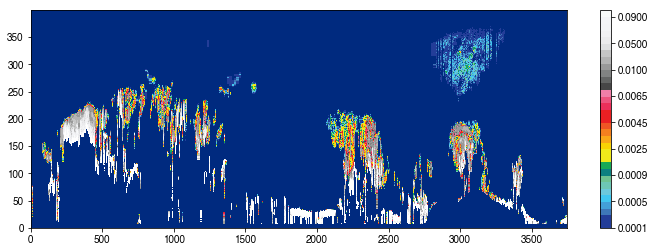

In [19]:
fig = mp.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plot = ax.pcolormesh(gdal_tbc_data_filtered.T[::-1,:], norm=norm, cmap=calipso_colormap)

mp.colorbar(plot, norm=norm)

In [134]:
lat_2d = numpy.repeat(lat, p_data.shape[1]).reshape((p_data.shape))

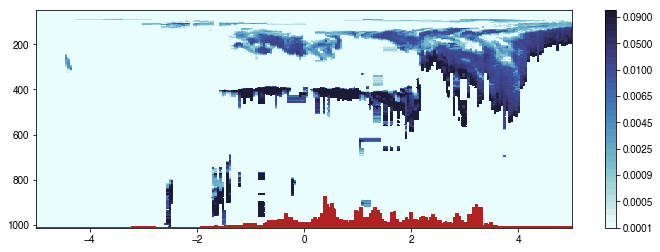

In [135]:
fig = mp.figure(figsize=(12,4))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     gdal_tbc_data_filtered.T[::-1,:], norm=norm, cmap=cmap_partial)

ax.set_facecolor('firebrick')
ax.set_ylim(1013.25,50)
ax.set_xlim(-5,5)
fig.colorbar(plot)